# Presentation figures

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

raw_data_path = './Raw Data/'

gaming = ['Basketball', 'Gorilla Tag', 'Blaston']
entertainment = ['Innerworld', 'ShapesXR', 'Zoe']
education = ['RecRoom', 'VRPlayer', 'Ultimechs']

def load_data(data_path = raw_data_path):
    data = pd.DataFrame()
    print('Loading data from ' + data_path)
    for folder in os.listdir(data_path):
        counter = 0
        for file in os.listdir(data_path + folder):
            if file.endswith('.csv'):
                tmp = pd.read_csv(data_path + folder + '/' + file)
                tmp['Time Stamp'] = tmp['Time Stamp'] // 60000
                tmp['power_wattage'] = tmp['power_wattage'] / 1000
                tmp['cpu_frequency_GHz'] = tmp['cpu_frequency_MHz'] / 1000
                tmp['gpu_frequency_GHz'] = tmp['gpu_frequency_MHz'] / 1000
                tmp['mem_frequency_GHz'] = tmp['mem_frequency_MHz'] / 1000
                tmp['app_vss_GB'] = tmp['app_vss_MB'] / 1024
                tmp['app_pss_GB'] = tmp['app_pss_MB'] / 1024
                tmp['timewarp_gpu_time_miliseconds'] = tmp['timewarp_gpu_time_microseconds'] / 1000
                if folder in gaming:
                    tmp['genre'] = 'Gaming'
                elif folder in entertainment:
                    tmp['genre'] = 'Entertainment'
                elif folder in education:
                    tmp['genre'] = 'Education'
                else:
                    tmp['genre'] = 'Unknown'
                tmp['app'] = folder
                tmp['run'] = counter
                counter += 1
                data = pd.concat([data, tmp])
    return data

df = load_data()
df

Loading data from ./Raw Data/


Time Stamp  available_memory_MB  app_pss_MB  battery_level_percentage  \
0              0                 2734         490                        56   
1              0                 2734         490                        56   
2              0                 2734         490                        56   
3              0                 2734         490                        56   
4              0                 2734         490                        56   
...          ...                  ...         ...                       ...   
1810          30                  995        2334                        51   
1811          30                  995        2334                        51   
1812          30                  995        2334                        51   
1813          30                  995        2334                        51   
1814          30                  995        2334                        51   

      battery_temperature_celcius  battery_current_now_milliamps  \
0                              36                           9999   
1                              36                           9999   
2                              36                           9999   
3                              36                           9999   
4                              36                           9999   
...                           ...                            ...   
1810                           45                           9999   
1811                           45                           9999   
1812                           45                           9999   
1813                           45                           9999   
1814                           45                           9999   

      sensor_temperature_celcius  power_current  power_level_state  \
0                              0           1043                  0   
1                              0           1022                  0   
2                              0           1057                  0   
3                              0           1092                  0   
4                              0           1073                  0   
...                          ...            ...                ...   
1810                           0           1500                  0   
1811                           0           1500                  0   
1812                           0           1500                  0   
1813                           0           1500                  0   
1814                           0           1500                  0   

      power_voltage  ...  render_scale  cpu_frequency_GHz  gpu_frequency_GHz  \
0              3752  ...             0              1.382              0.441   
1              3752  ...           100              1.171              0.441   
2              3752  ...           100              1.478              0.525   
3              3775  ...           100              1.478              0.525   
4              3775  ...           100              1.478              0.525   
...             ...  ...           ...                ...                ...   
1810           3703  ...           100              1.478              0.525   
1811           3703  ...           100              1.478              0.525   
1812           3703  ...           100              1.478              0.525   
1813           3703  ...           100              0.710              0.525   
1814           3718  ...           100              0.940              0.525   

      mem_frequency_GHz  app_vss_GB  app_pss_GB  \
0                 1.017   43.559570    0.478516   
1                 1.555   43.559570    0.478516   
2                 1.017   43.559570    0.478516   
3                 1.353   43.559570    0.478516   
4                 1.353   43.559570    0.478516   
...                 ...         ...         ...   
1810              1.804   13.236328    2.279297   
1811              1.804   13.2

In [119]:
plt.rcParams['font.family'] = 'Arial'
custom_params = {"axes.spines.right": False, 
                 "axes.spines.top": False,
                 "axes.spines.left": True,
                 "axes.spines.bottom": True,
                 "xtick.bottom": True,
                 "ytick.left": True,
                 "axes.edgecolor": "black",
                 "axes.grid": True,
                 "axes.linewidth": 1.5, 
                 "axes.facecolor": "white", 
                 "grid.color": "lightgray"}

custom_params_lineplot = {"axes.spines.right": True, 
                 "axes.spines.top": False,
                 "axes.spines.left": True,
                 "axes.spines.bottom": True,
                 "xtick.bottom": True,
                 "ytick.left": True,
                 "axes.edgecolor": "black",
                 "axes.grid": True,
                 "axes.linewidth": 1.5, 
                 "axes.facecolor": "white", 
                 "grid.color": "lightgray"}

custom_mean = {"marker":"d",
                "markerfacecolor":"white", 
                "markeredgecolor":"black",
                "markersize":"7"}

custom_outliers = {'marker': 'o', 
                   'markerfacecolor': 'grey'}

sns.set_theme(style='whitegrid', rc=custom_params, font_scale=2)

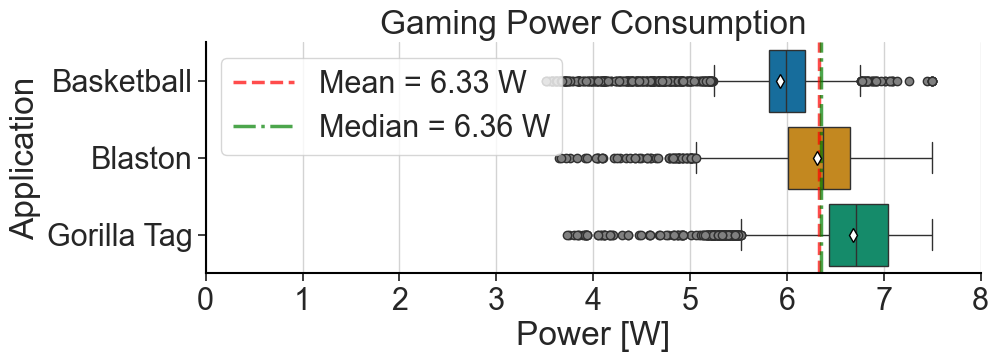

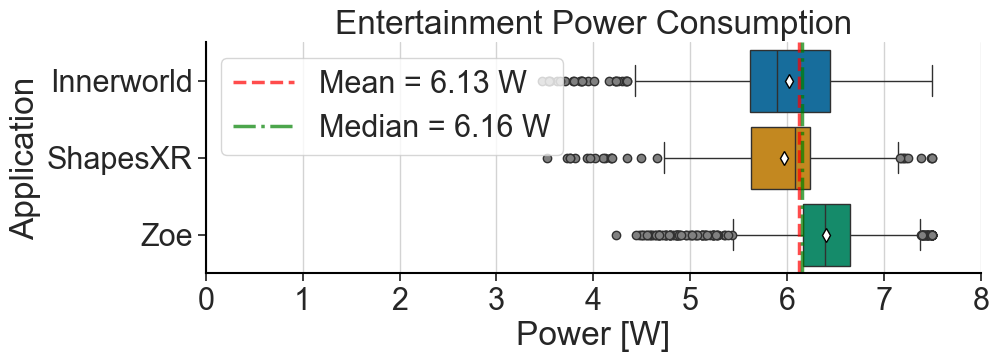

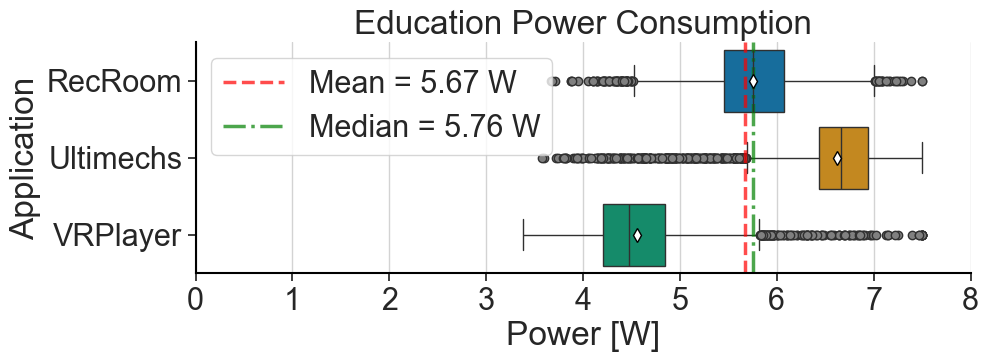

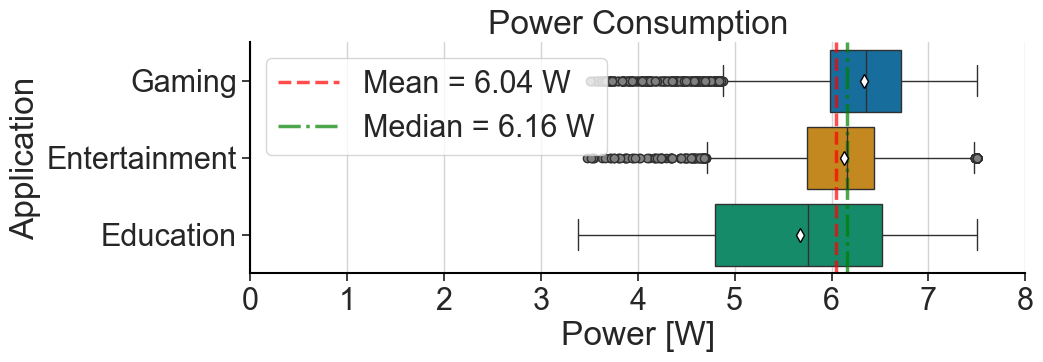

In [121]:

def boxplot(data, datapoint, app, title):
    fig, ax = plt.subplots(1, 1, figsize=(10, 3))
    sns.boxplot(x=datapoint, y=app, data=data, showmeans=True, meanprops=custom_mean, flierprops=custom_outliers, palette='colorblind', ax=ax)
    ax.set_title(title)
    ax.set_xlabel(datapoint)
    ax.set_ylabel('Application')
    ax.set_xlabel('Power [W]')
    ax.set_xlim(0, 8)
    # add vertical lines for the mean
    mean = data[datapoint].mean()
    median = data[datapoint].median()
    legend_elements = [ax.axvline(mean, color='red', linestyle='--', alpha=0.7, linewidth=2.5, label=f'Mean = {mean:.2f} W'), 
                        ax.axvline(median, color='green', linestyle='-.', alpha=0.7, linewidth=2.5, label=f'Median = {median:.2f} W')]
    ax.legend(handles=legend_elements, loc='upper left')
    plt.show()

def lineplot(data, datapoint1, datapoint2, app, title, ylim_top=8):
    fig, ax = plt.subplots(1, 3, figsize=(18, 3))
    for i in range(3):
        sns.lineplot(data=data[data['run'] == i], x='Time Stamp', y=datapoint1, palette='colorblind', ax=ax[i], color='green', alpha=0.5)
        ax[i].set_title(title)
        ax[i].set_xlabel('Timestamp [min]')
        ax[i].set_ylabel('Power [W]')
        ax[i].set_ylim(0, 8)
        ax2 = ax[i].twinx()
        sns.lineplot(data=data[data['run'] == i], x='Time Stamp', y=datapoint2, palette='colorblind', ax=ax2, color='red', alpha=0.5)
        ax2.set_ylim(0, ylim_top)
        if datapoint2 == 'cpu_frequency_GHz':
            ax2.set_ylabel('CPU Frequency [GHz]')
        elif datapoint2 == 'gpu_frequency_GHz':
            ax2.set_ylabel('GPU Frequency [GHz]')
        elif datapoint2 == 'mem_frequency_GHz':
            ax2.set_ylabel('Memory Frequency [GHz]')
        elif datapoint2 == 'cpu_utilization_percentage':
            ax2.set_ylabel('CPU Utilization [%]')
        elif datapoint2 == 'gpu_utilization_percentage':
            ax2.set_ylabel('GPU Utilization [%]')
        elif datapoint2 == 'app_pss_GB':
            ax2.set_ylabel('Storage [GB]')
        elif datapoint2 == 'app_vss_GB':
            ax2.set_ylabel('Memory [GB]')
        elif datapoint2 == 'timewarp_gpu_time_miliseconds':
            ax2.set_ylabel('Timewarp GPU Time [ms]')
        if i < 2: # <-- Only turn off the ticks for the first two subplots
            ax2.set_ylabel(None)
        if i > 0:
            ax[i].set_ylabel(None)
    plt.show()

gaming = ['Basketball', 'Gorilla Tag', 'Blaston']
entertainment = ['Innerworld', 'ShapesXR', 'Zoe']
education = ['RecRoom', 'VRPlayer', 'Ultimechs']

boxplot(df[df['app'].isin(gaming)], 'power_wattage', 'app', 'Gaming Power Consumption')
boxplot(df[df['app'].isin(entertainment)], 'power_wattage', 'app', 'Entertainment Power Consumption')
boxplot(df[df['app'].isin(education)], 'power_wattage', 'app', 'Education Power Consumption')
boxplot(df, 'power_wattage', 'genre', 'Power Consumption')

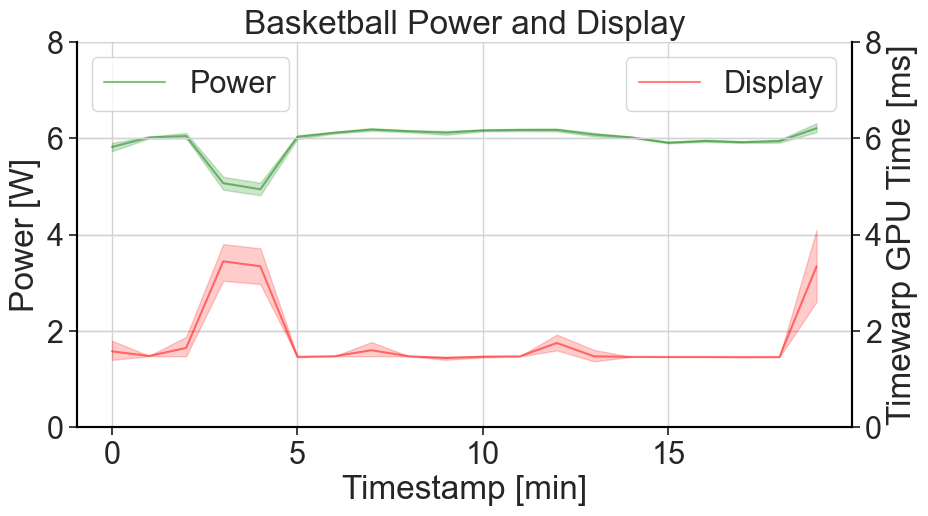

In [115]:
sns.set_theme(style='whitegrid', rc=custom_params_lineplot, font_scale=2)

def single_lineplot(data, datapoint1, datapoint2, app, run, title, ylim_top=8, position='lower'):
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    sns.lineplot(data=data[(data['app'] == app) & (data['run'] == run)], x='Time Stamp', y=datapoint1, palette='colorblind', ax=ax, color='green', alpha=0.5, label='Power')
    ax.set_title(title)
    ax.set_xlabel('Timestamp [min]')
    ax.set_ylabel('Power [W]')
    ax.set_ylim(0, 8)
    ax.legend(loc=f'{position} left')
    ax2 = ax.twinx()
    sns.lineplot(data=data[(data['app'] == app) & (data['run'] == run)], x='Time Stamp', y=datapoint2, palette='colorblind', ax=ax2, color='red', alpha=0.5, label=title.split(' ')[-1])
    ax2.set_ylim(0, ylim_top)
    if datapoint2 == 'cpu_frequency_GHz':
        ax2.set_ylabel('CPU Frequency [GHz]')
    elif datapoint2 == 'gpu_frequency_GHz':
        ax2.set_ylabel('GPU Frequency [GHz]')
    elif datapoint2 == 'mem_frequency_GHz':
        ax2.set_ylabel('Memory Frequency [GHz]')
    elif datapoint2 == 'cpu_utilization_percentage':
        ax2.set_ylabel('CPU Utilization [%]')
    elif datapoint2 == 'gpu_utilization_percentage':
        ax2.set_ylabel('GPU Utilization [%]')
    elif datapoint2 == 'app_pss_GB':
        ax2.set_ylabel('Storage [GB]')
    elif datapoint2 == 'app_vss_GB':
        ax2.set_ylabel('Memory [GB]')
    elif datapoint2 == 'timewarp_gpu_time_miliseconds':
        ax2.set_ylabel('Timewarp GPU Time [ms]')
    ax2.legend(loc=f'{position} right')
    # fig.legend()

single_lineplot(df, 'power_wattage', 'timewarp_gpu_time_miliseconds', 'Basketball', 1, 'Basketball Power and Display', 8, 'upper')

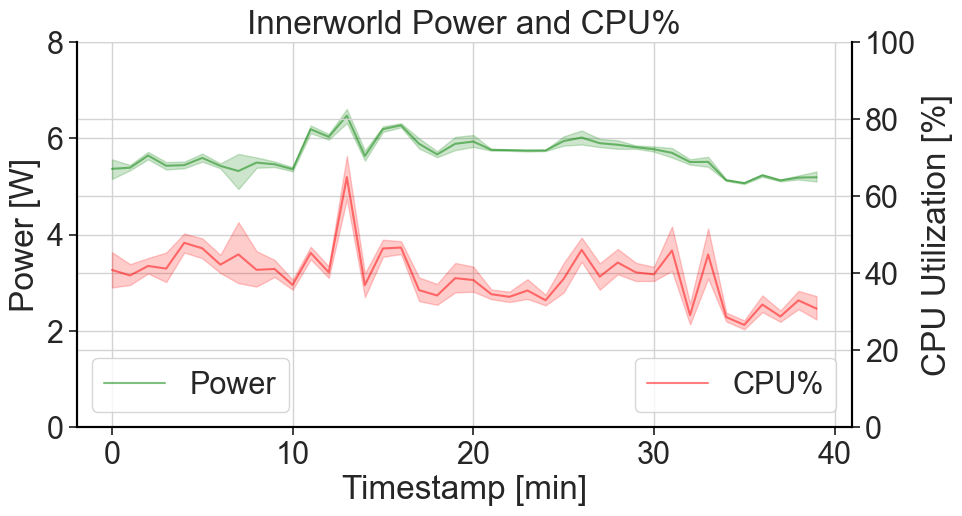

In [118]:
single_lineplot(df, 'power_wattage', 'cpu_utilization_percentage', 'Innerworld', 0, 'Innerworld Power and CPU%', 100, 'lower')

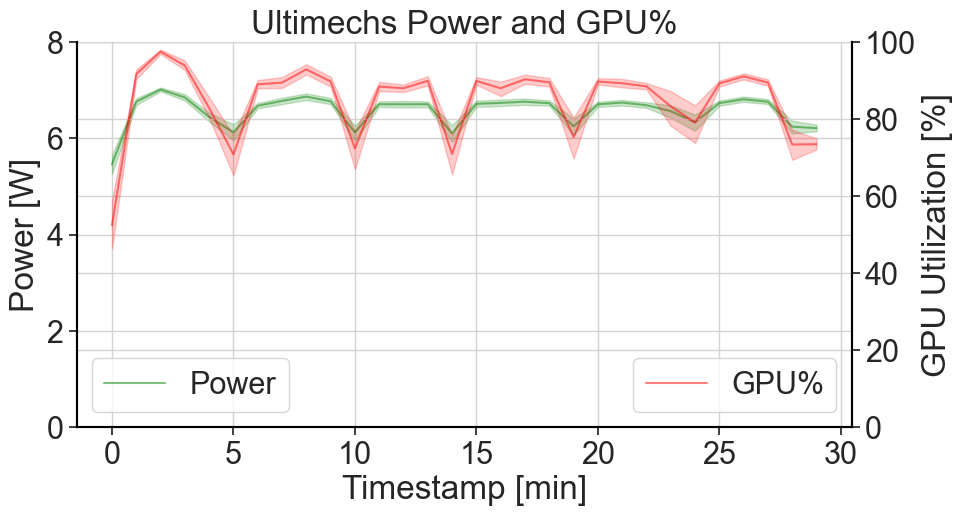

In [117]:
single_lineplot(df, 'power_wattage', 'gpu_utilization_percentage', 'Ultimechs', 0, 'Ultimechs Power and GPU%', 100, 'lower')

# Many graphs

## CPU Utilisation

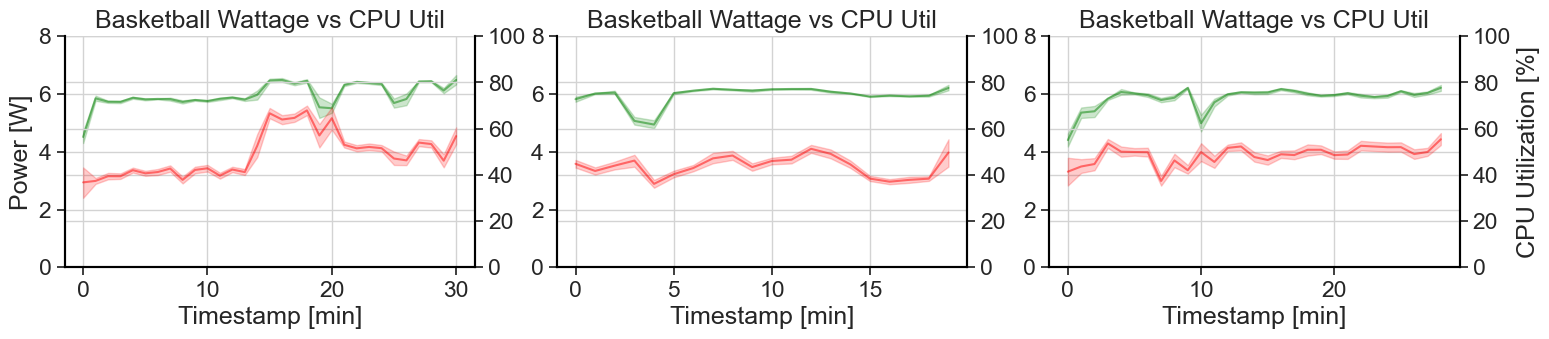

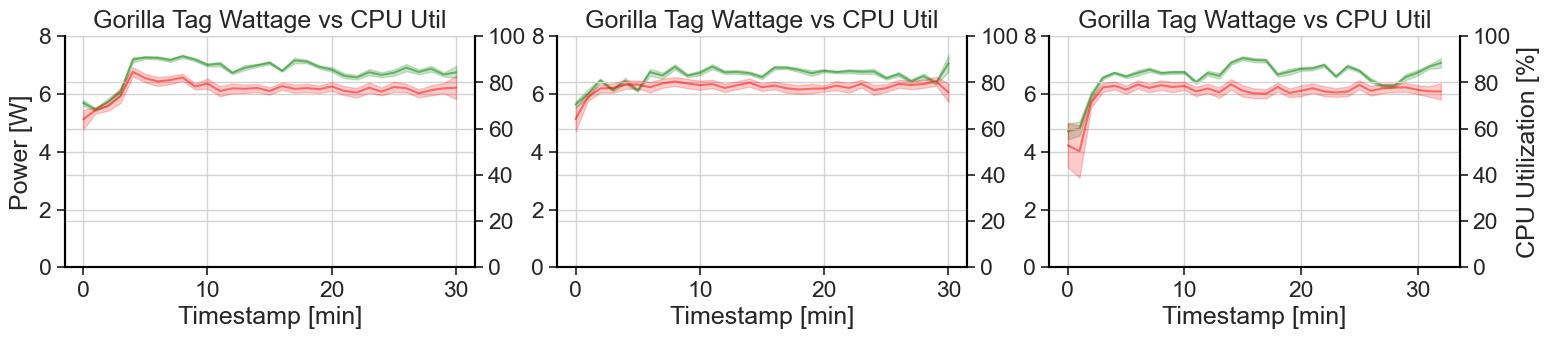

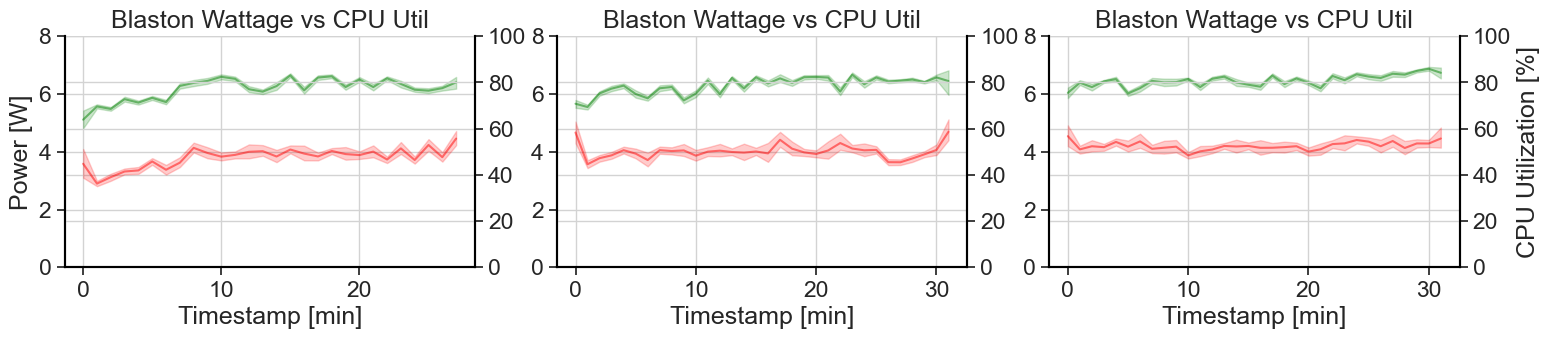

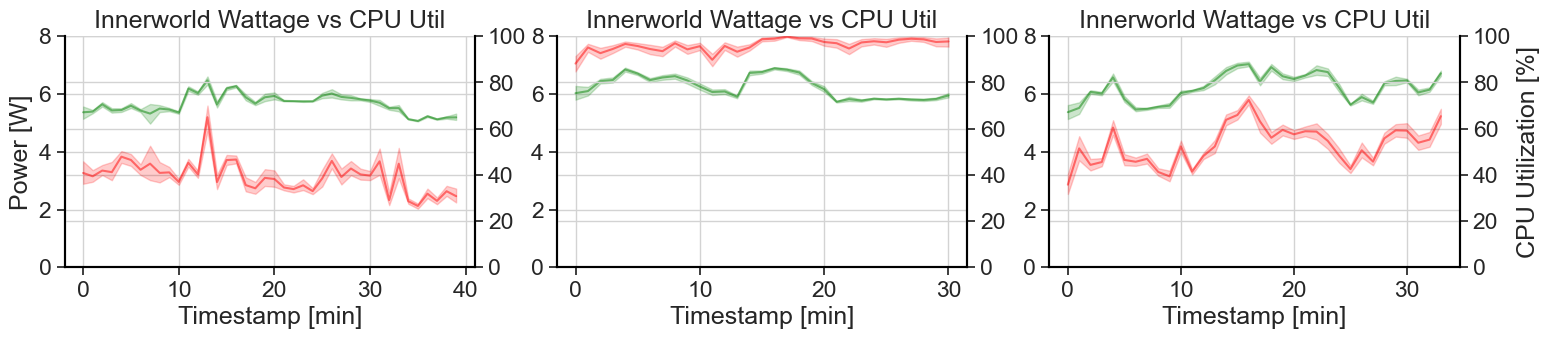

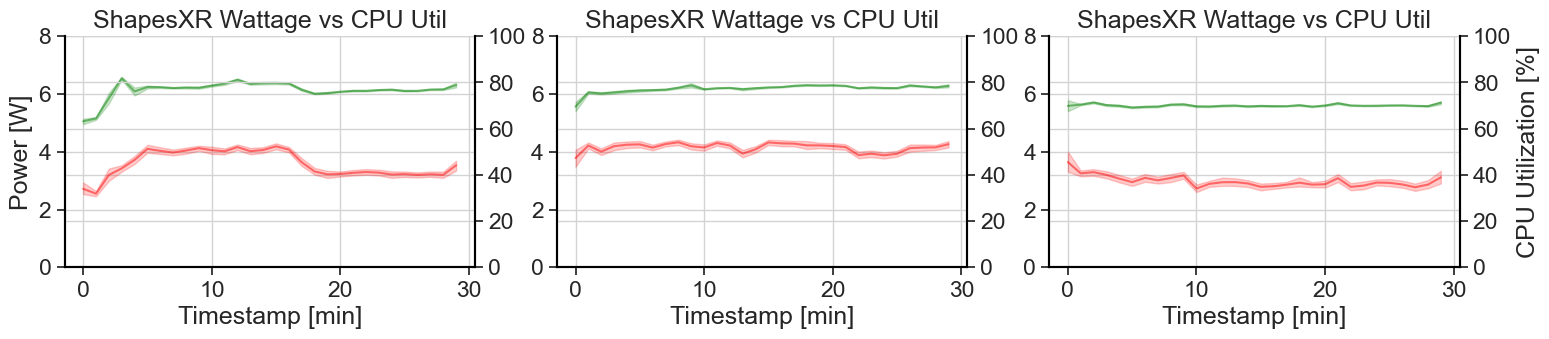

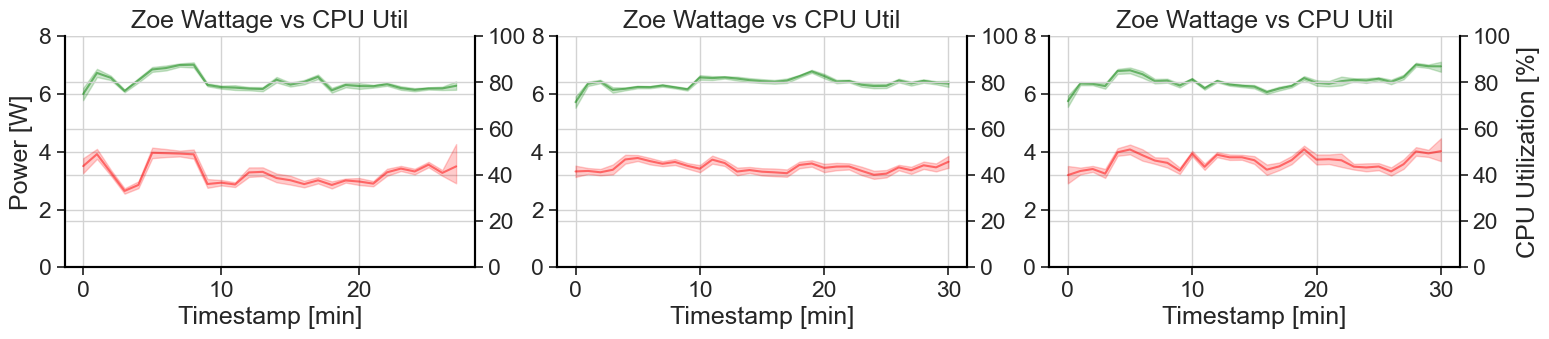

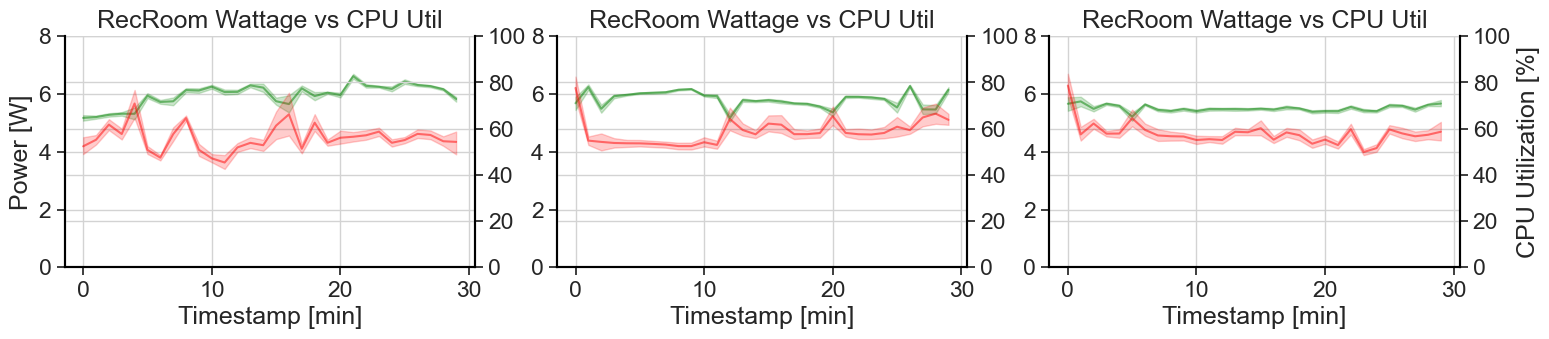

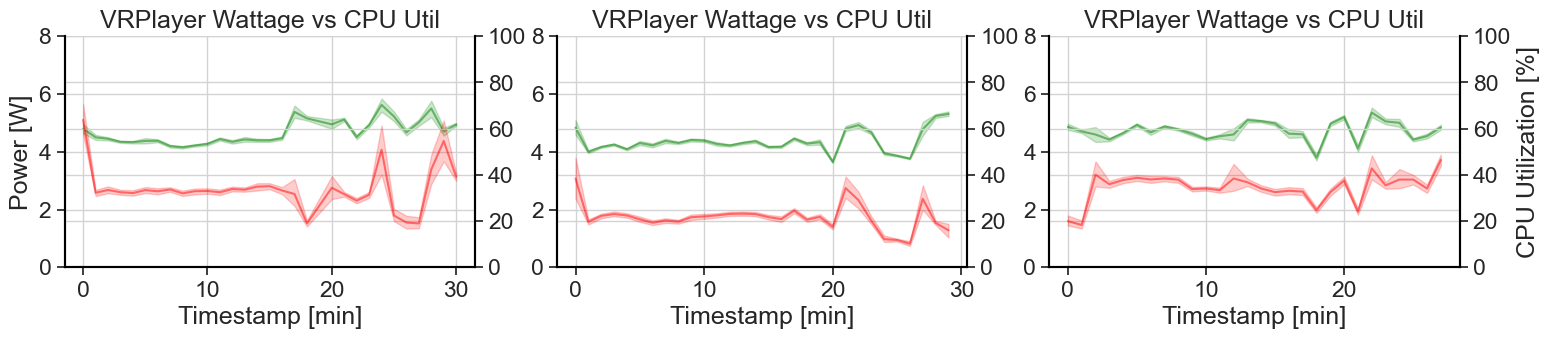

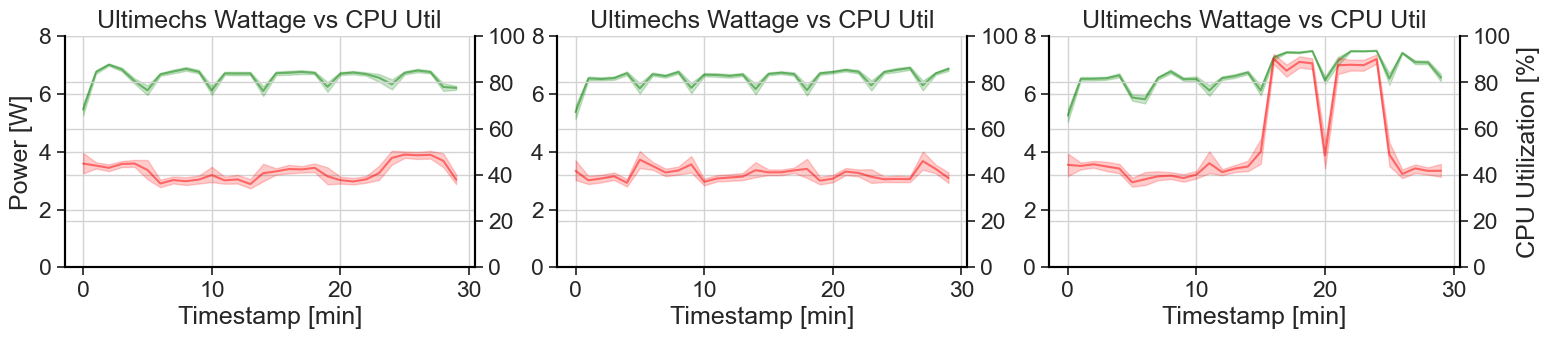

In [77]:
for app in gaming + entertainment + education:
    lineplot(df[df['app'] == app], 'power_wattage', 'cpu_utilization_percentage', app, app + ' Wattage vs CPU Util', 100)


## GPU Utilisation

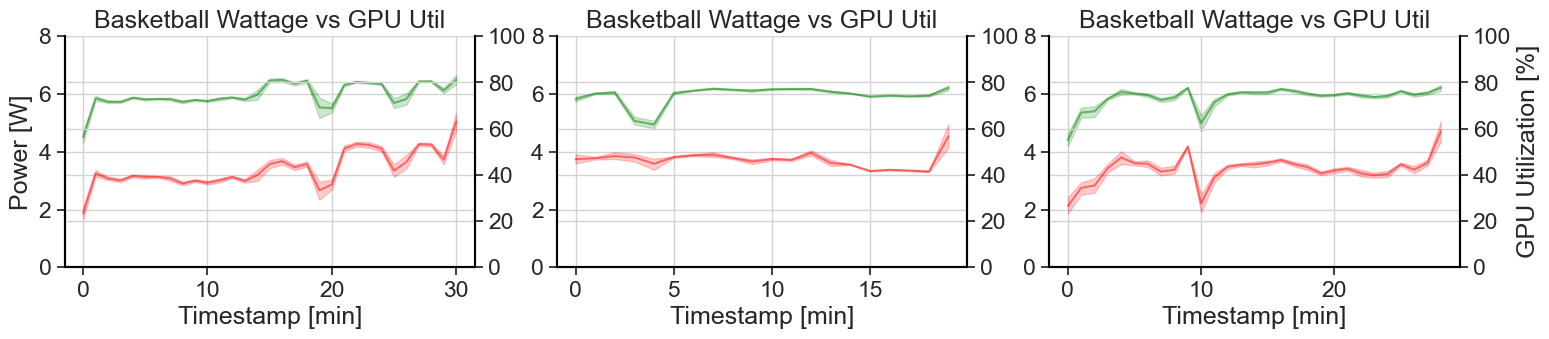

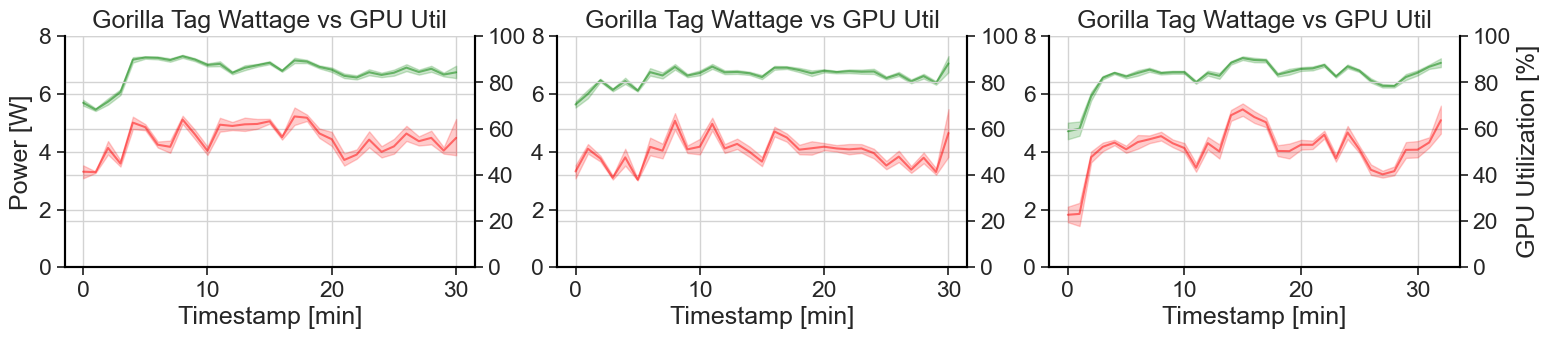

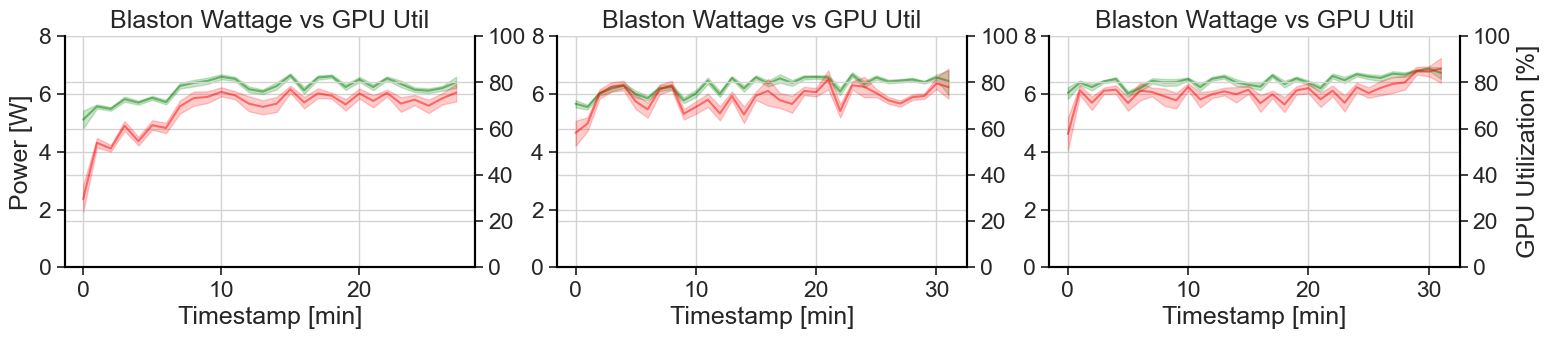

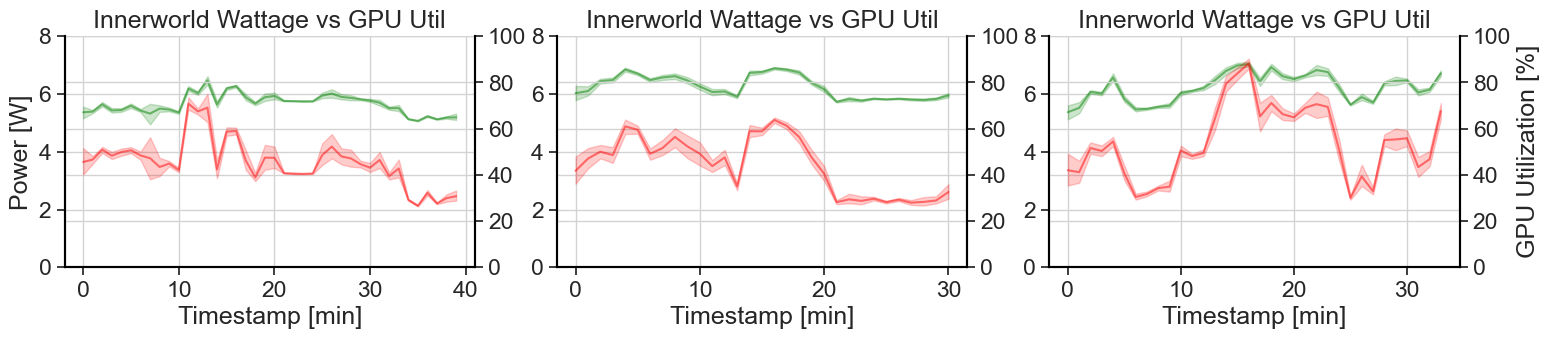

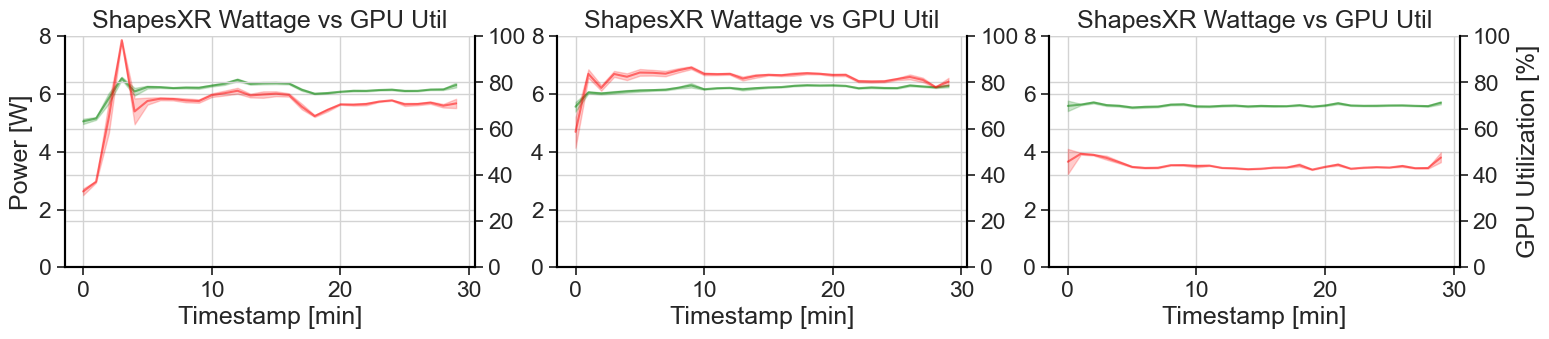

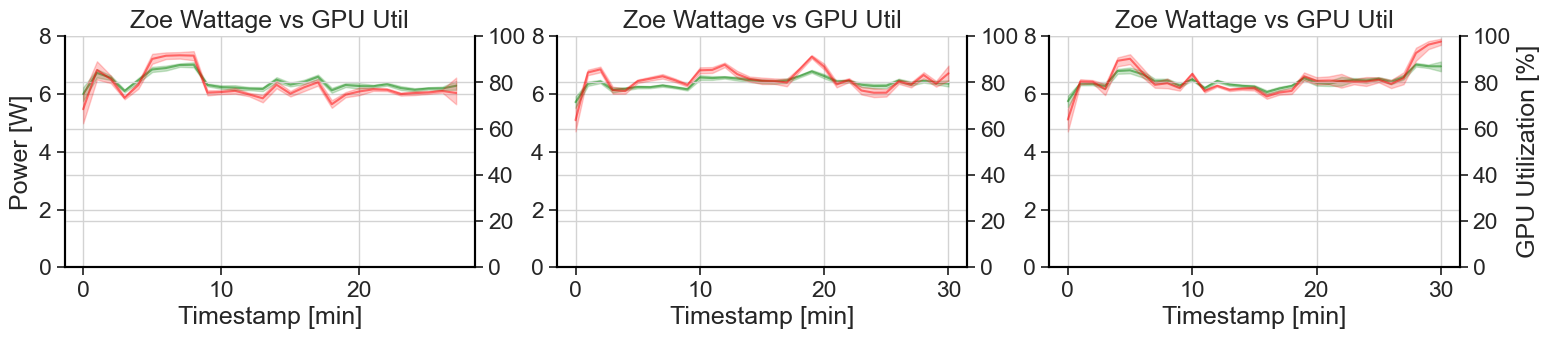

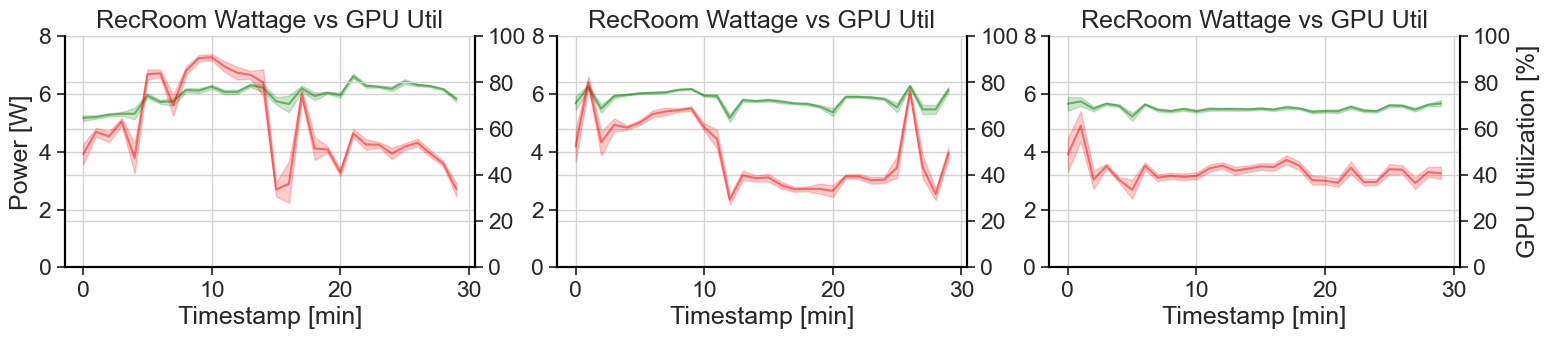

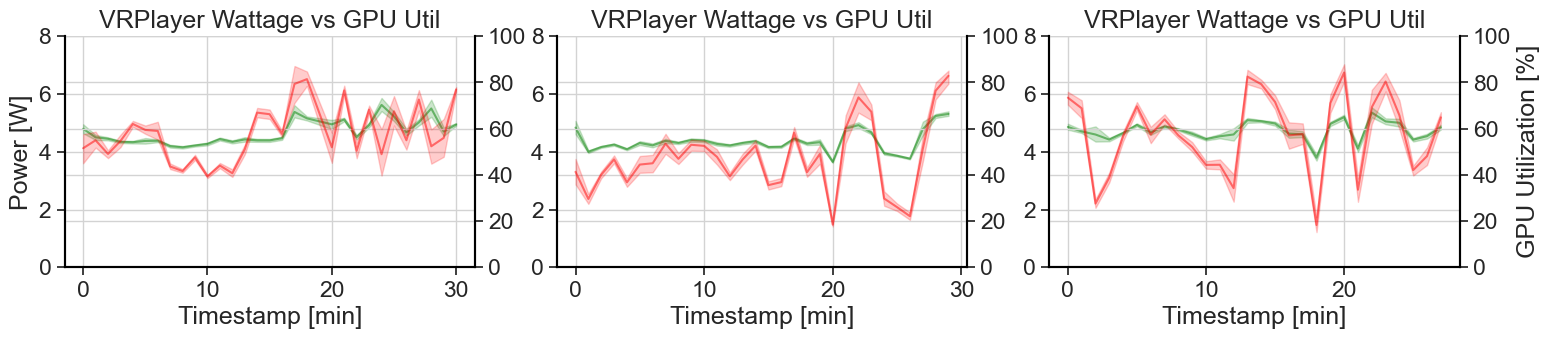

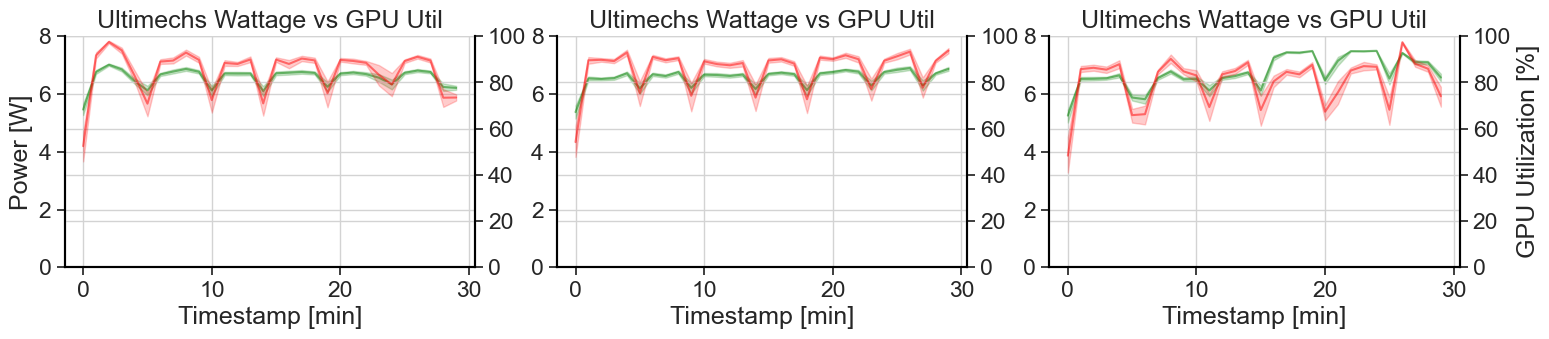

In [78]:
for app in gaming + entertainment + education:
    lineplot(df[df['app'] == app], 'power_wattage', 'gpu_utilization_percentage', app, app + ' Wattage vs GPU Util', 100)

## Display

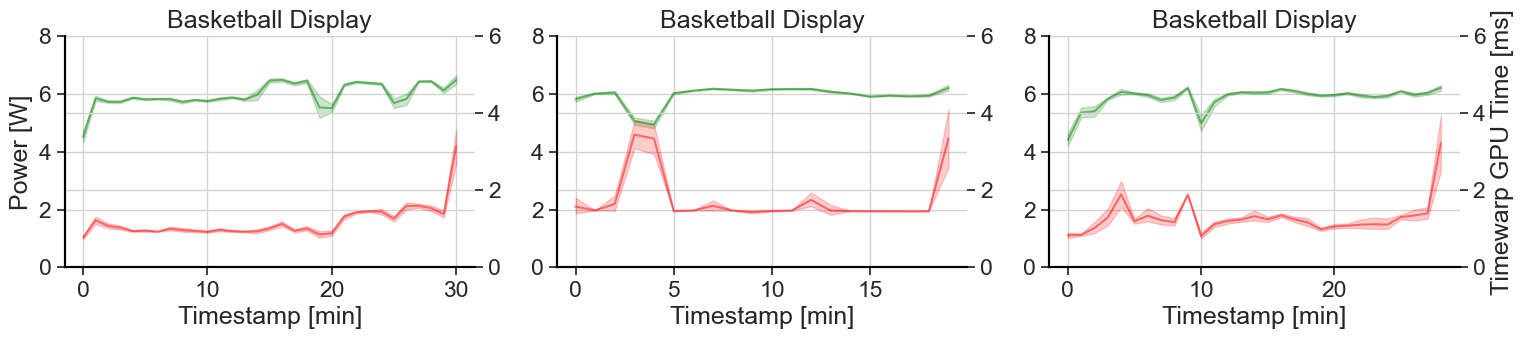

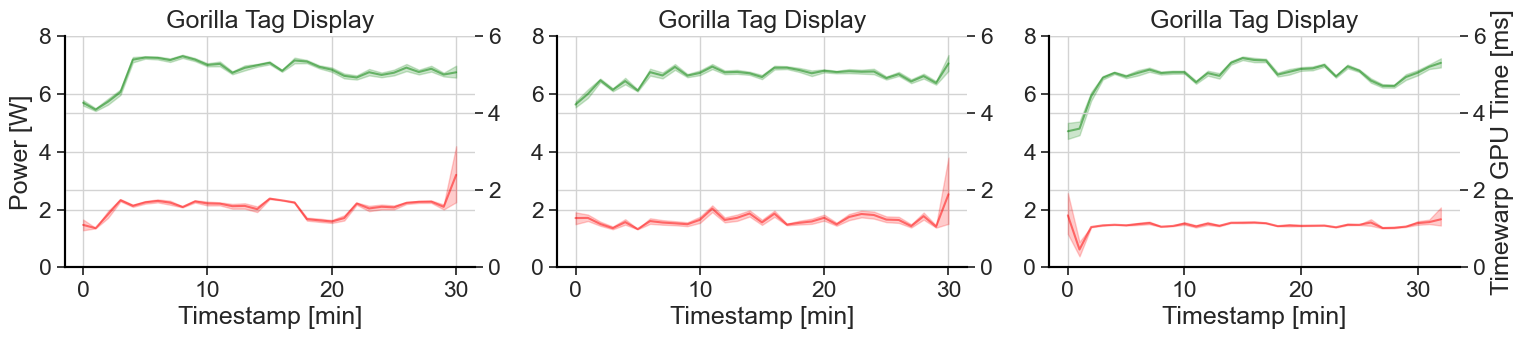

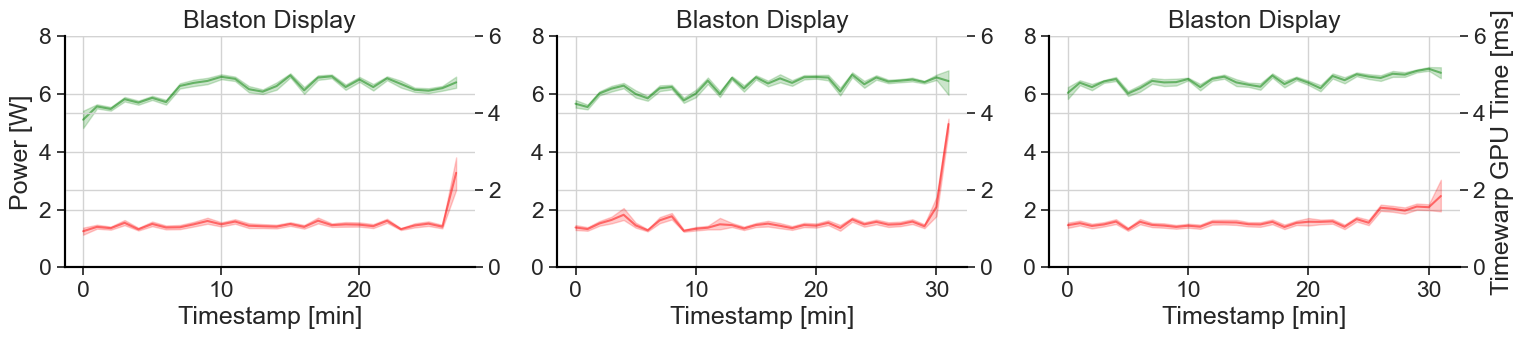

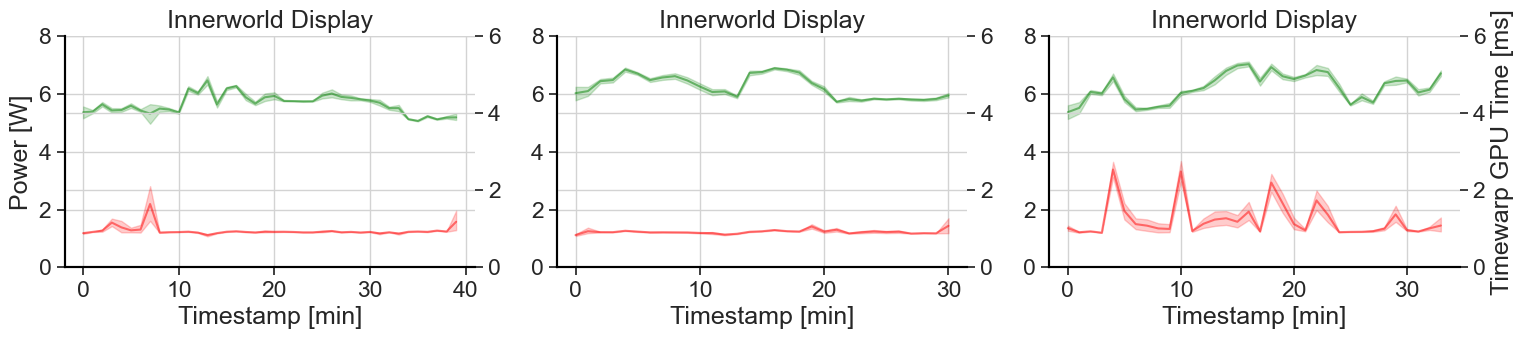

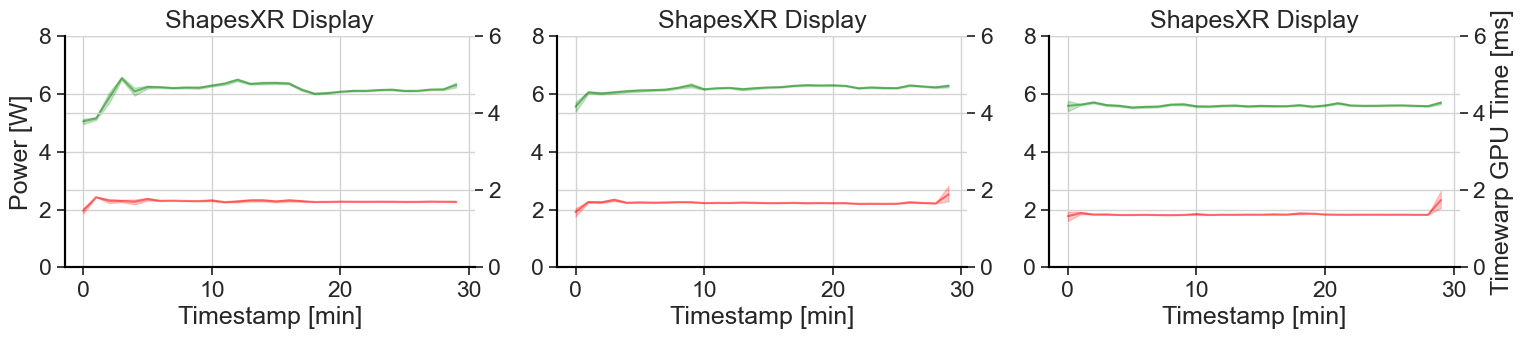

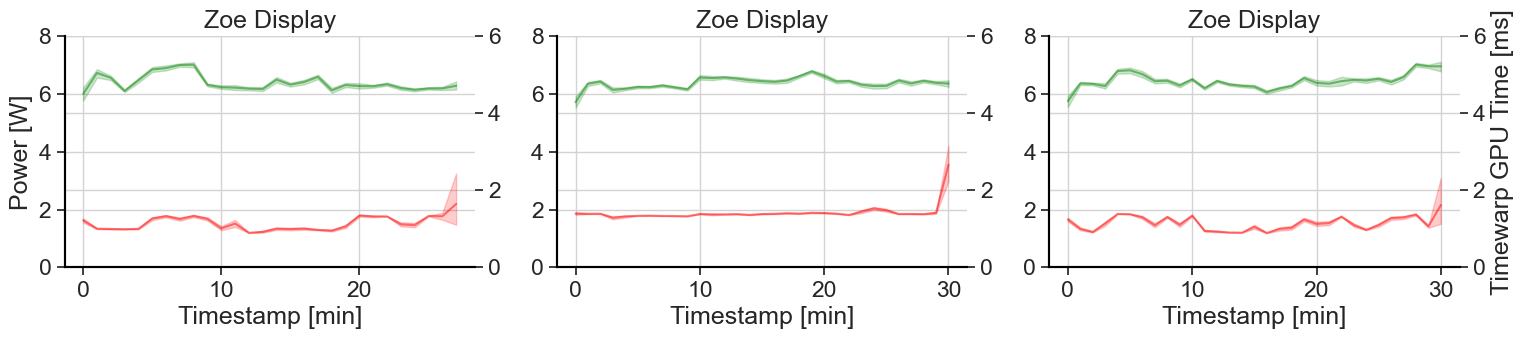

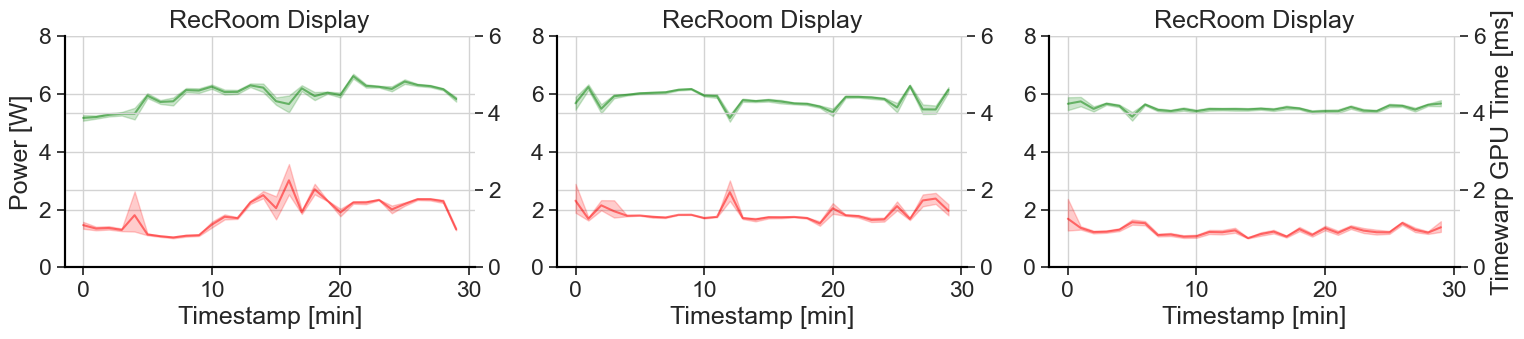

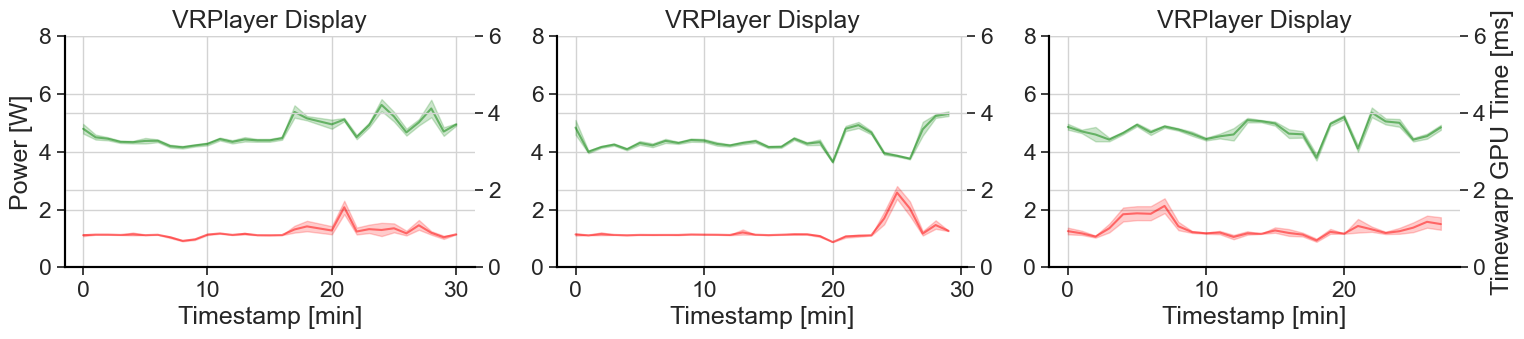

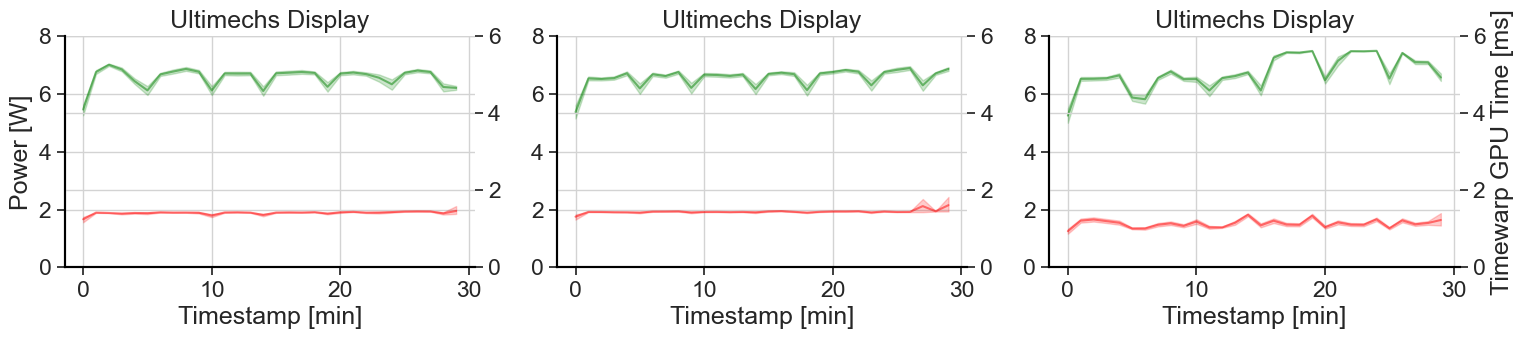

In [65]:
for app in gaming + entertainment + education:
    lineplot(df[df['app'] == app], 'power_wattage', 'timewarp_gpu_time_miliseconds', app, app + ' Display', 6)


## Storage

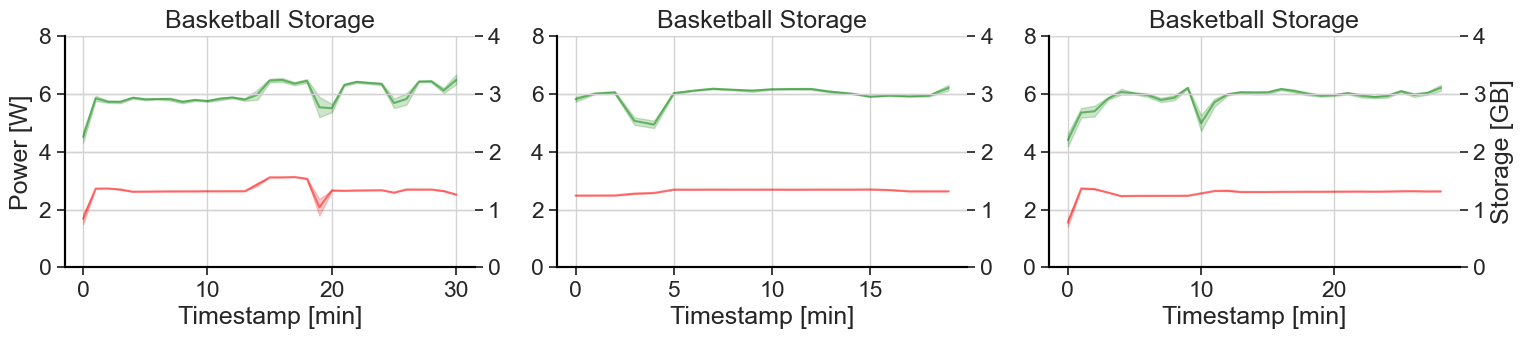

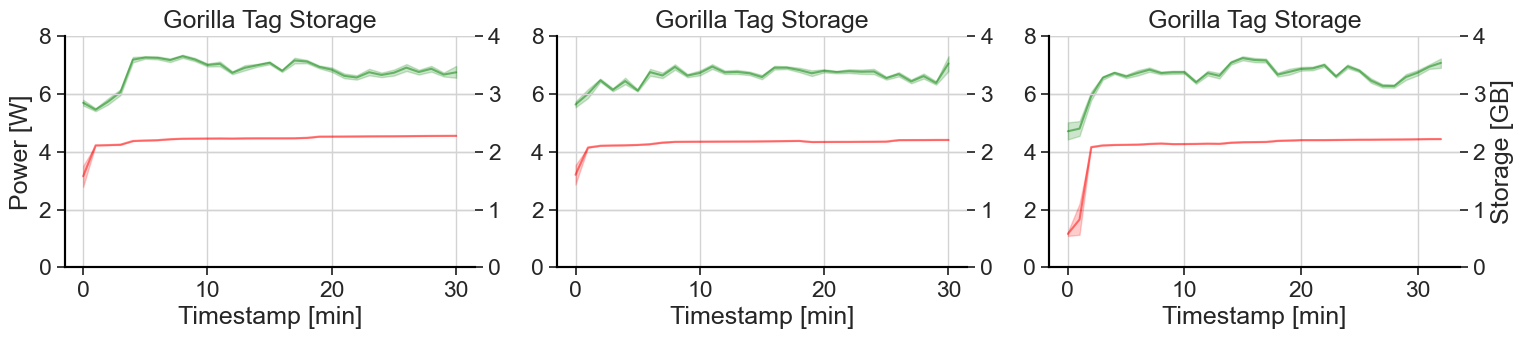

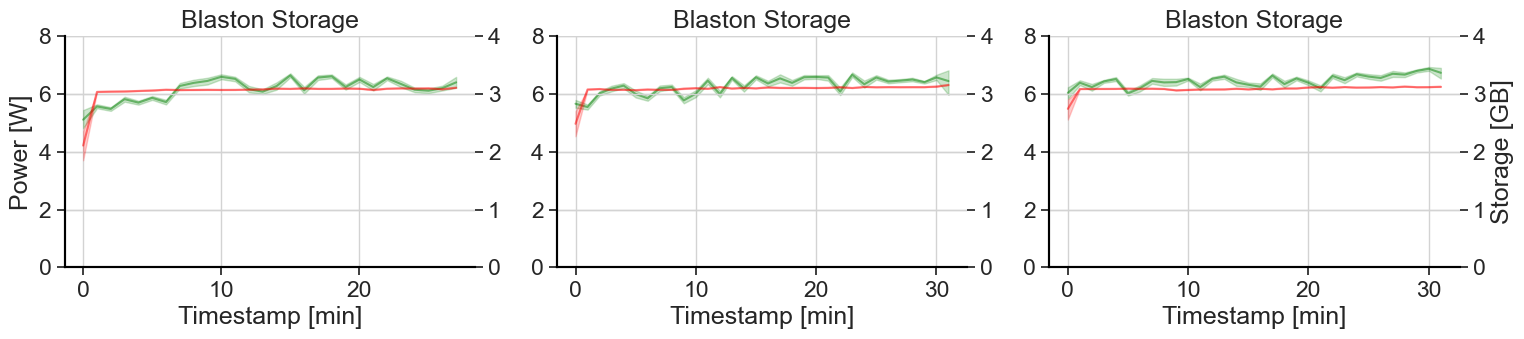

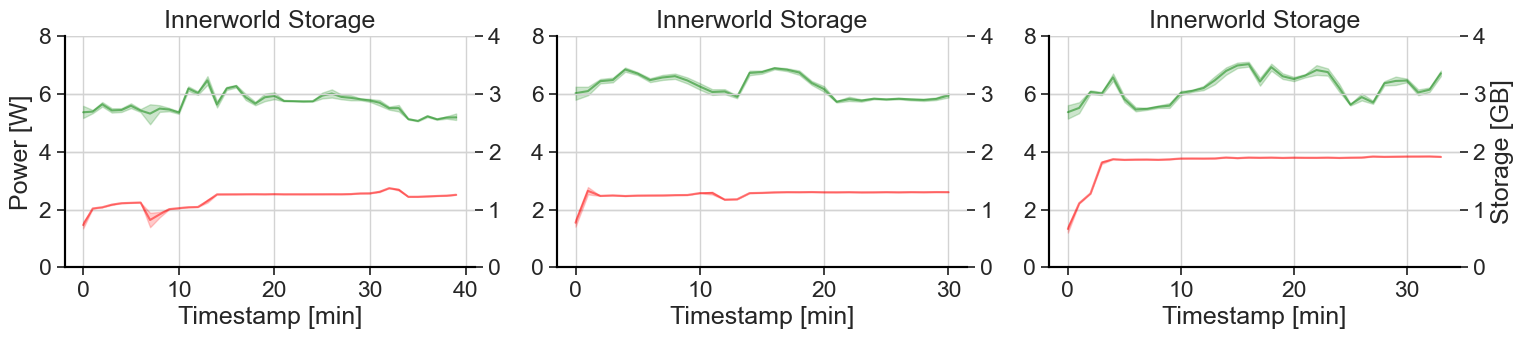

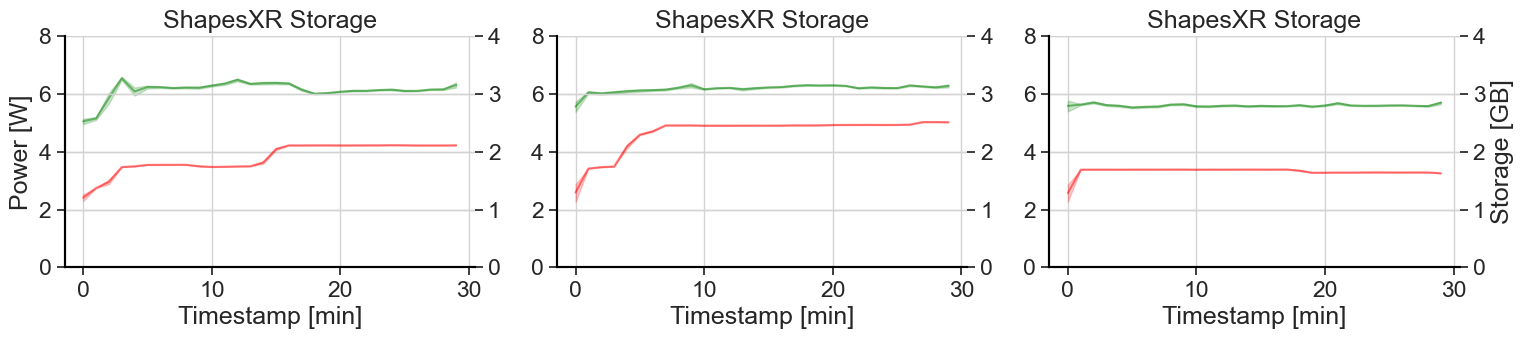

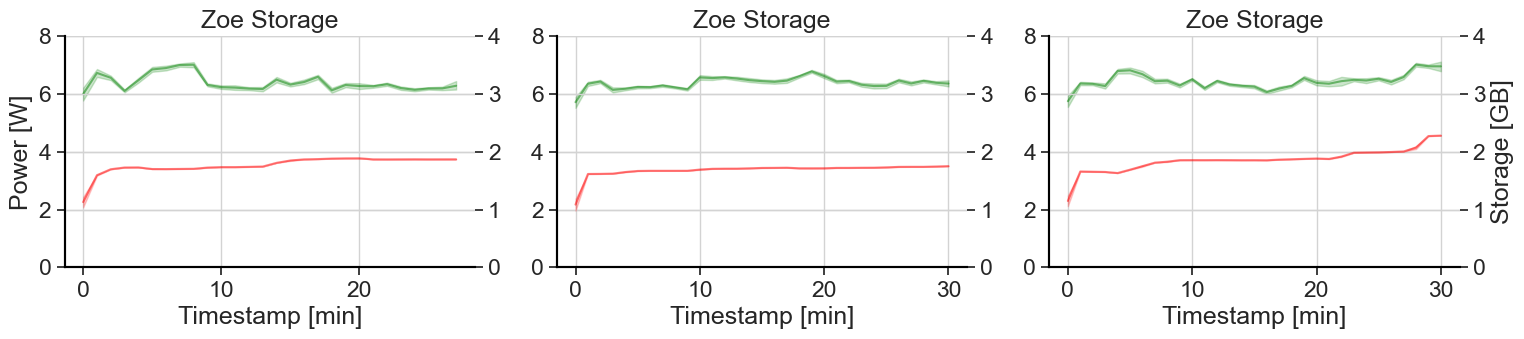

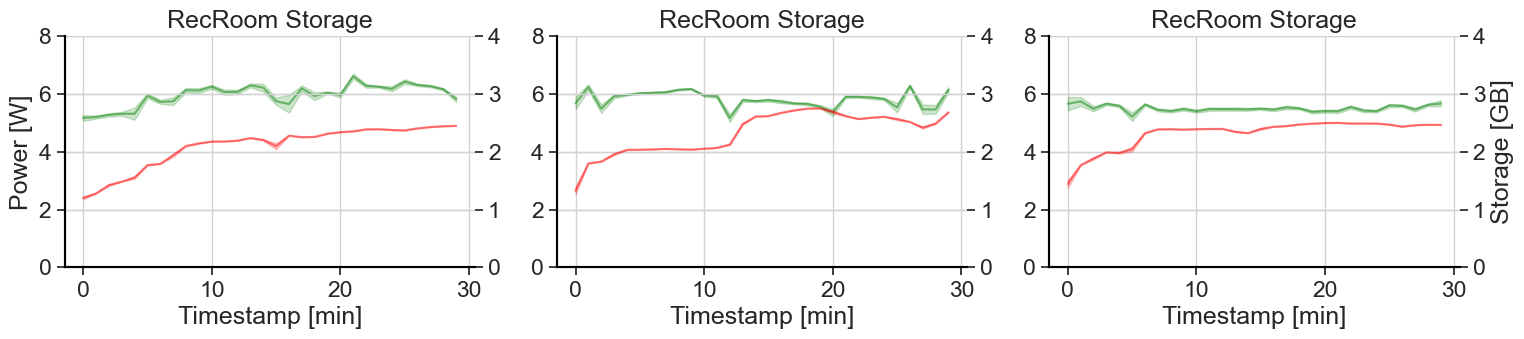

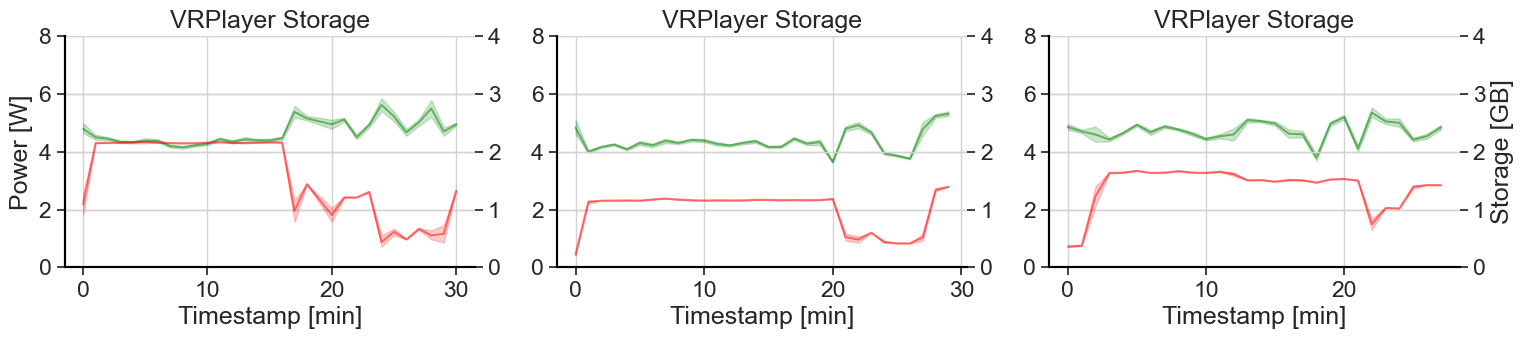

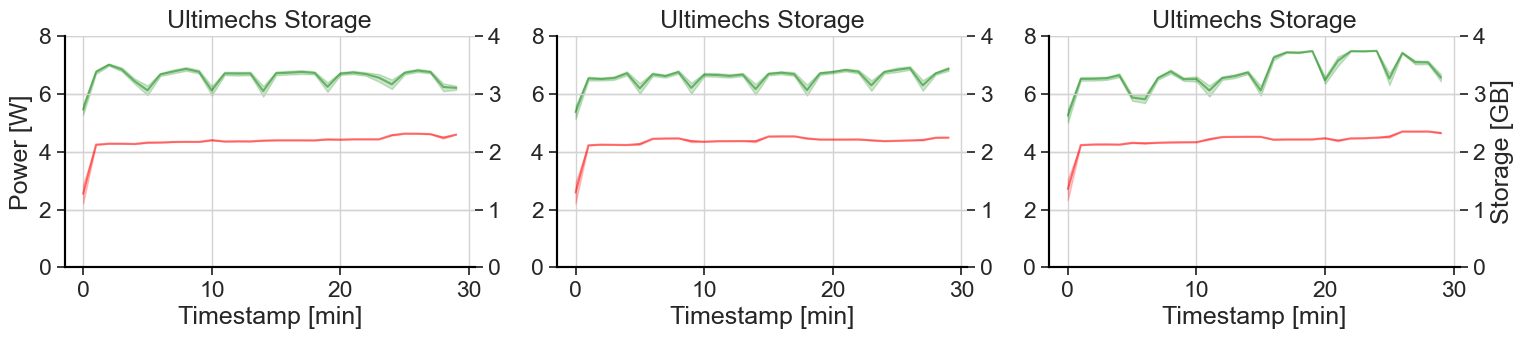

In [66]:
for app in gaming + entertainment + education:
    lineplot(df[df['app'] == app], 'power_wattage', 'app_pss_GB', app, app + ' Storage', 4)


## Memory

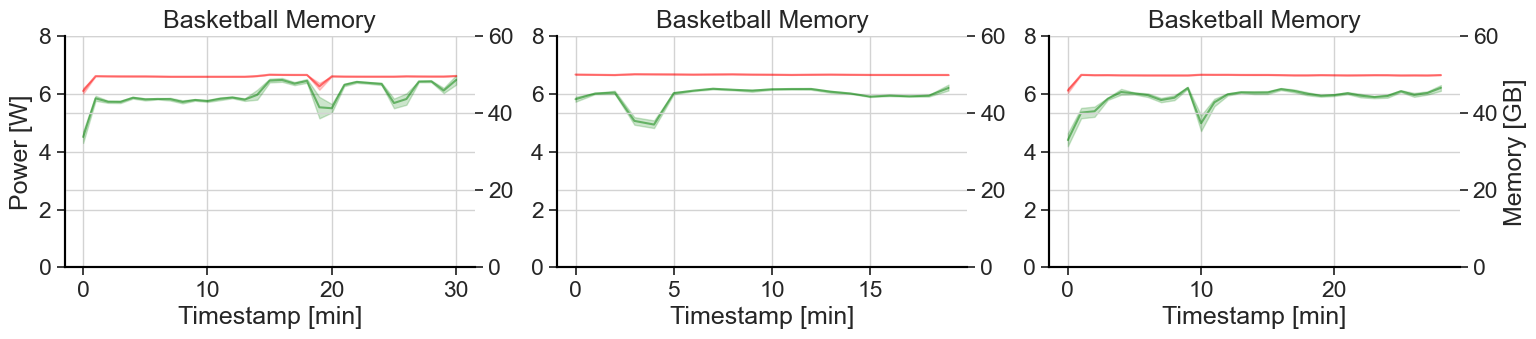

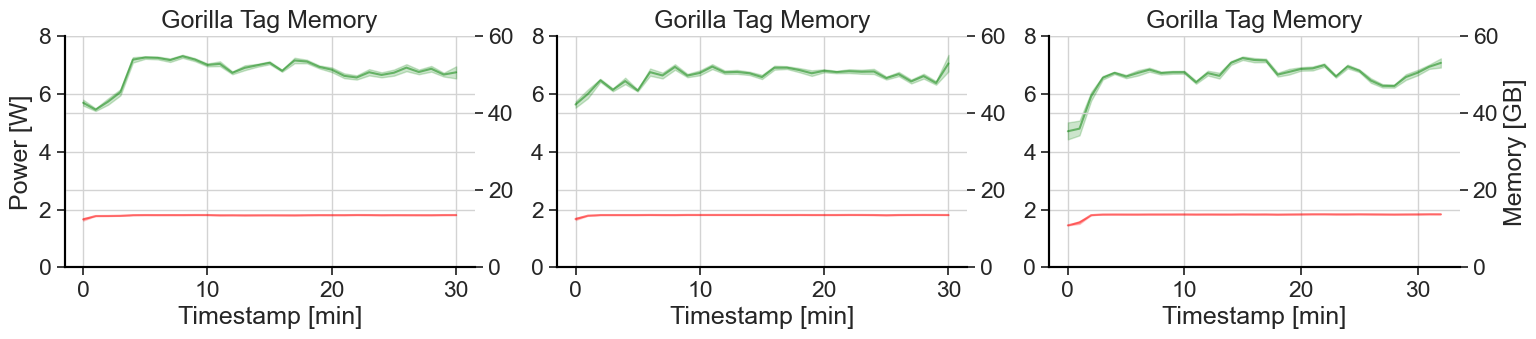

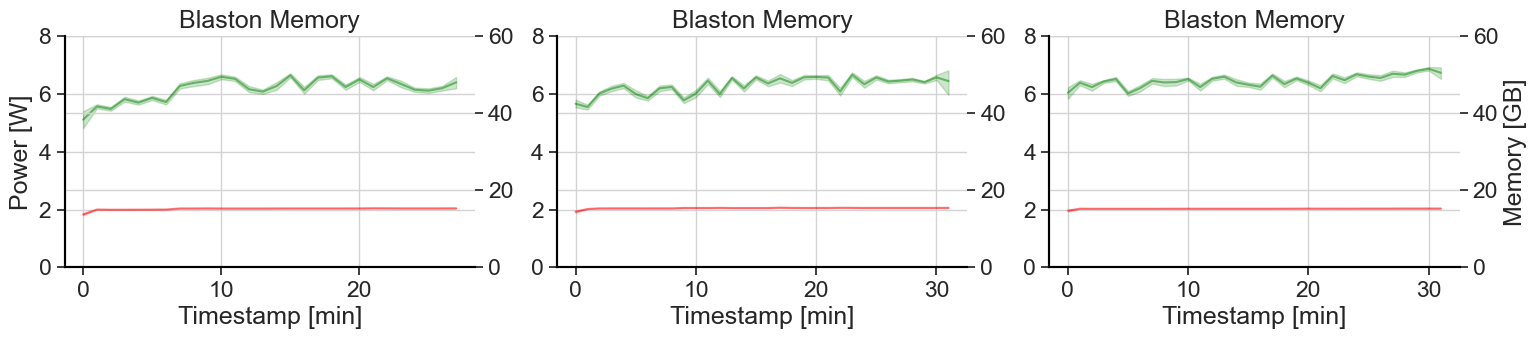

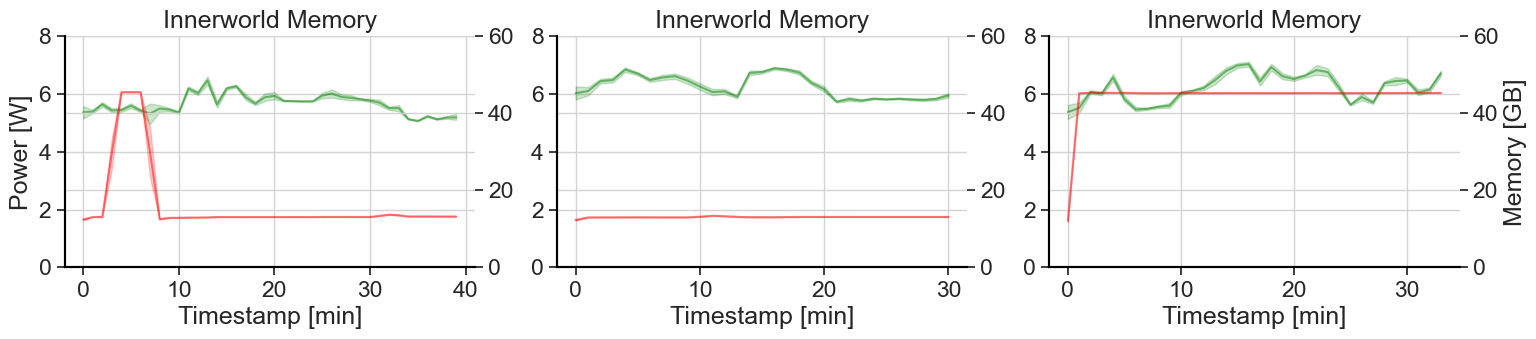

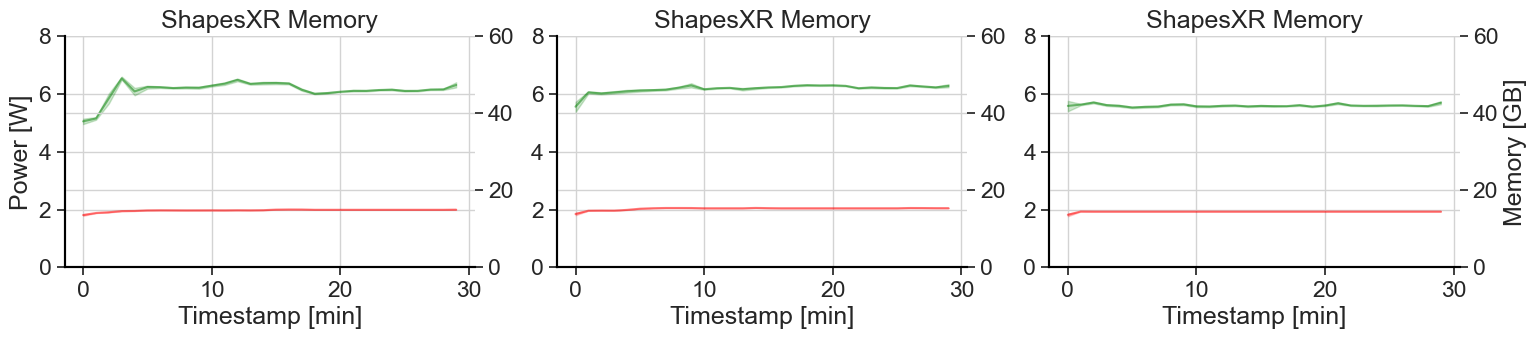

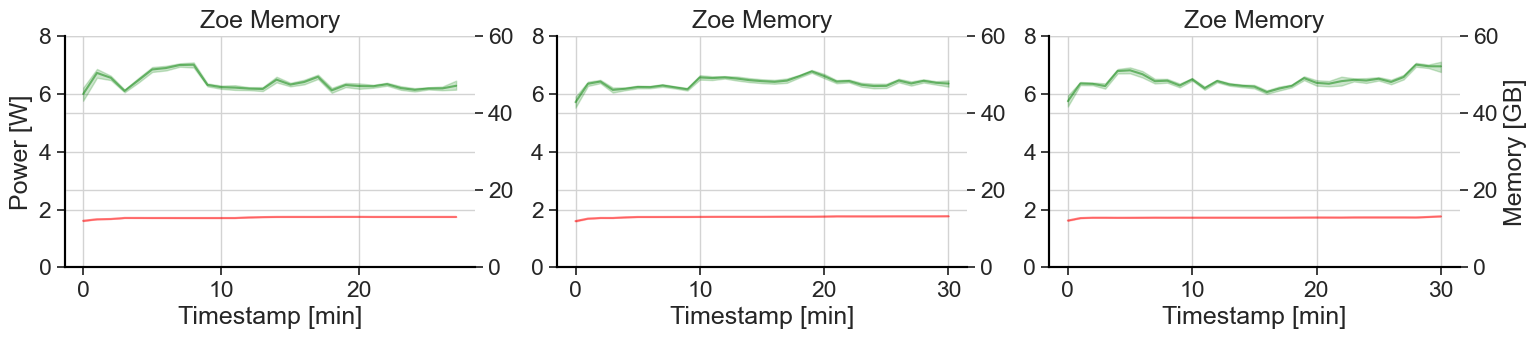

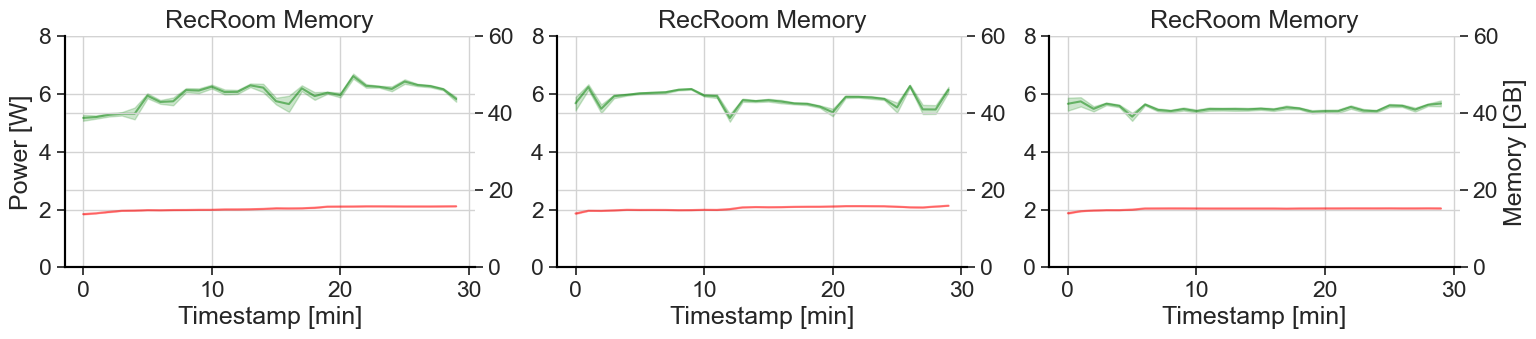

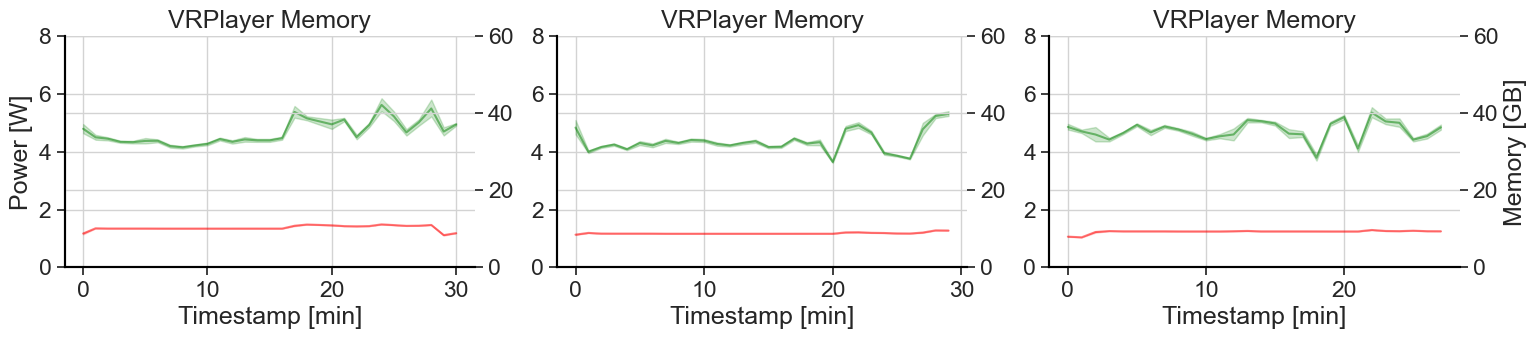

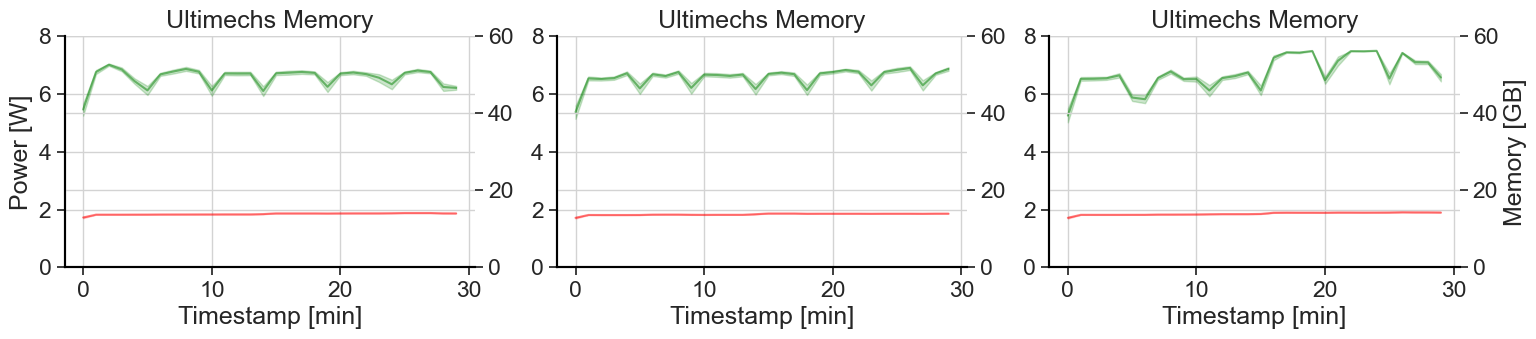

In [67]:
for app in gaming + entertainment + education:
    lineplot(df[df['app'] == app], 'power_wattage', 'app_vss_GB', app, app + ' Memory', 60)
